# Feature Engineering: Derive New Input Variables

Apdated from Jason Brownlee. 2020. [Data Preparation for Machine Learning](https://machinelearningmastery.com/data-preparation-for-machine-learning/).

## Overview

This module covers polynomial feature engineering for predictive modeling tasks. We explore how to create new features by transforming existing input variables using polynomial combinations and interactions between features.

## Learning Objectives

- Learn how machine learning algorithms perform with polynomial input features
- Understand how to use polynomial features transform to create new versions of input variables
- Examine how the degree of polynomial impacts the number of input features created
- Apply polynomial feature transformation to real datasets

### Tasks to complete

- Implement polynomial feature transforms
- Evaluate model performance with different polynomial degrees
- Compare results across transformations
- Create visualizations of feature relationships

## Prerequisites

- Python 3.x environment
- Basic understanding of Python programming
- Basic understanding of machine learning concepts
- Familiarity with NumPy and scikit-learn libraries

## Get Started

Setup steps:

- Install required Python packages:
  - numpy
  - pandas
  - scikit-learn
  - matplotlib

### Install required packages

In [19]:
# Installs matplotlib, a comprehensive library for creating static, interactive, and animated visualizations in Python.
%pip install matplotlib
# Installs numpy, the fundamental package for numerical computation in Python, providing support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
%pip install numpy
# Installs pandas, a powerful data manipulation and analysis library, offering data structures like DataFrames for efficiently handling and analyzing structured data.
%pip install pandas
# Installs scikit-learn, a popular machine learning library providing simple and efficient tools for data mining and data analysis, built on NumPy, SciPy, and matplotlib, featuring various classification, regression and clustering algorithms.
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Import necessary libraries

In [20]:
# Import the warnings module to handle warning messages during execution.
import warnings
# Import the Path class from the pathlib module for working with file paths in an object-oriented way.
from pathlib import Path

# Import the pyplot module from matplotlib for plotting graphs and visualizations.
from matplotlib import pyplot as plt
# Import the asarray, mean, and std functions from the numpy library for numerical operations, specifically array conversion, mean, and standard deviation calculations.
from numpy import asarray, mean, std
# Import the DataFrame and read_csv classes from the pandas library for data manipulation and reading CSV files.
from pandas import DataFrame, read_csv
# Import the RepeatedStratifiedKFold and cross_val_score classes from sklearn.model_selection for model evaluation using repeated stratified k-fold cross-validation.
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
# Import the KNeighborsClassifier class from sklearn.neighbors for using the K-Nearest Neighbors classification algorithm.
from sklearn.neighbors import KNeighborsClassifier
# Import the Pipeline class from sklearn.pipeline to construct composite estimators.
from sklearn.pipeline import Pipeline
# Import the LabelEncoder and PolynomialFeatures classes from sklearn.preprocessing for data preprocessing tasks like encoding labels and generating polynomial features.
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

## Polynomial Features

Polynomial features are those features created by raising existing features to an exponent. For
example, if a dataset had one input feature X, then a polynomial feature would be the addition
of a new feature (column) where values were calculated by squaring the values in X, e.g. $X^2$.
This process can be repeated for each input variable in the dataset, creating a transformed
version of each. As such, polynomial features are a type of feature engineering, e.g. the creation
of new input features based on the existing features. The degree of the polynomial is used to
control the number of features added, e.g. a degree of 3 will add two new variables for each
input variable. Typically a small degree is used such as 2 or 3.

It is also common to add new variables that represent the interaction between features, e.g. 
a new column that represents one variable multiplied by another. This too can be repeated
for each input variable creating a new interaction variable for each pair of input variables. A
squared or cubed version of an input variable will change the probability distribution, separating
the small and large values, a separation that is increased with the size of the exponent.

This separation can help some machine learning algorithms make better predictions and is
common for regression predictive modeling tasks and generally tasks that have numerical input
variables. Typically linear algorithms, such as linear regression and logistic regression, respond
well to the use of polynomial input variables.

## Polynomial Feature Transform

The polynomial features transform is available in the scikit-learn Python machine learning
library via the `PolynomialFeatures` class.

It generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [21]:
# Demonstrate the types of polynomial features created
# Import the asarray function from the numpy library to create arrays.
from numpy import asarray
# Import the PolynomialFeatures class from sklearn.preprocessing to generate polynomial features.
from sklearn.preprocessing import PolynomialFeatures

# Define the dataset as a numpy array with shape (3, 2).
data = asarray([[2, 3], [2, 3], [2, 3]])
# Print the original dataset to the console.
print("Original Data:")
# Print the 'data' numpy array.
print(data)

# Create a PolynomialFeatures object, setting the degree of the polynomial to 2.
trans = PolynomialFeatures(degree=2)
# Fit the PolynomialFeatures transformer to the 'data' and then transform 'data' into polynomial features.
data = trans.fit_transform(data)
# Print a newline character and a message indicating the polynomial features are of degree 2.
print("\nPolynomial Features (Degree=2):")
# Print the 'data' array after the polynomial feature transformation.
print(data)

Original Data:
[[2 3]
 [2 3]
 [2 3]]

Polynomial Features (Degree=2):
[[1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]]


Running the example first reports the raw data with two features (columns) and each feature
has the same value, either 2 or 3. Then the polynomial features are created, resulting in six
features, matching what was described above.

The *degree* argument controls the number of features created and defaults to 2. The
*interaction_only* argument means that only the raw values (degree 1) and the interaction
(pairs of values multiplied with each other) are included, defaulting to False. The *include_bias*
argument defaults to True to include the bias feature.

## Wisconsin Breast Cancer Dataset

The Wisconsin Breast Cancer Dataset (WBCD) is a widely used dataset for breast cancer diagnosis. It contains features computed from digitized images of fine needle aspirate (FNA) of breast masses, which describe characteristics of cell nuclei.

### **Dataset Information:**
- **Number of Instances:** 569
- **Number of Features:** 30 (excluding the ID column)
- **Target Variable:** Diagnosis (Malignant or Benign)

### **Feature Description:**
Each instance in the dataset has 30 real-valued features extracted from images of cell nuclei, including:
- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of gray-scale values)
- Perimeter
- Area
- Smoothness
- Compactness
- Concavity
- Concave points
- Symmetry
- Fractal dimension

### **Insights:**
- Features such as **concavity, concave points, and radius** tend to have higher importance in distinguishing malignant from benign tumors.
- **Malignant tumors** generally have higher values in most of these features compared to benign ones.
- The dataset is commonly used in machine learning models for binary classification.

### **Source:**
This dataset is available from the UCI Machine Learning Repository: [Wisconsin Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).


The **Wisconsin Breast Cancer Dataset** is crucial for predictive modeling in medical research. It provides meaningful insights into breast cancer diagnosis and is often used for testing machine learning algorithms like Support Vector Machines, Random Forest, and Neural Networks.

Further analysis could involve feature selection techniques and hyperparameter tuning to optimize classification performance.

### Loading data and summarizing the variables

In [22]:
# Load the Wisconsin Breast Cancer Dataset from ../../Data
# Defines the file path to the Wisconsin Breast Cancer dataset.
data_path = "../../Data/wdbc.data"

# Load and summarize the dataset
# Reads the data from the specified file path into a pandas DataFrame, assuming no header row.
dataset = read_csv(data_path, header=None)

# Add column names (from the dataset description)
# Defines a list of column names for the dataset, based on the dataset description.
columns = [
    "id", "diagnosis",  # Target: M=Malignant, B=Benign
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean",
    "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]
# Assigns the defined list of column names to the DataFrame.
dataset.columns = columns

# Summarize the dataset
# Prints a header indicating the display of the first 5 rows.
print("\nFirst 5 rows:")
# Prints the first 5 rows of the DataFrame to display sample data.
print(dataset.head())

# Prints a header indicating the display of the dataset shape.
print("\nDataset Shape:", dataset.shape)
# Prints the shape of the DataFrame (number of rows and columns).
print("\nSummary Statistics:")
# Prints summary statistics for each numerical column in the DataFrame (count, mean, std, min, quartiles, max).
print(dataset.describe())


First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_

### Histograms of the variables

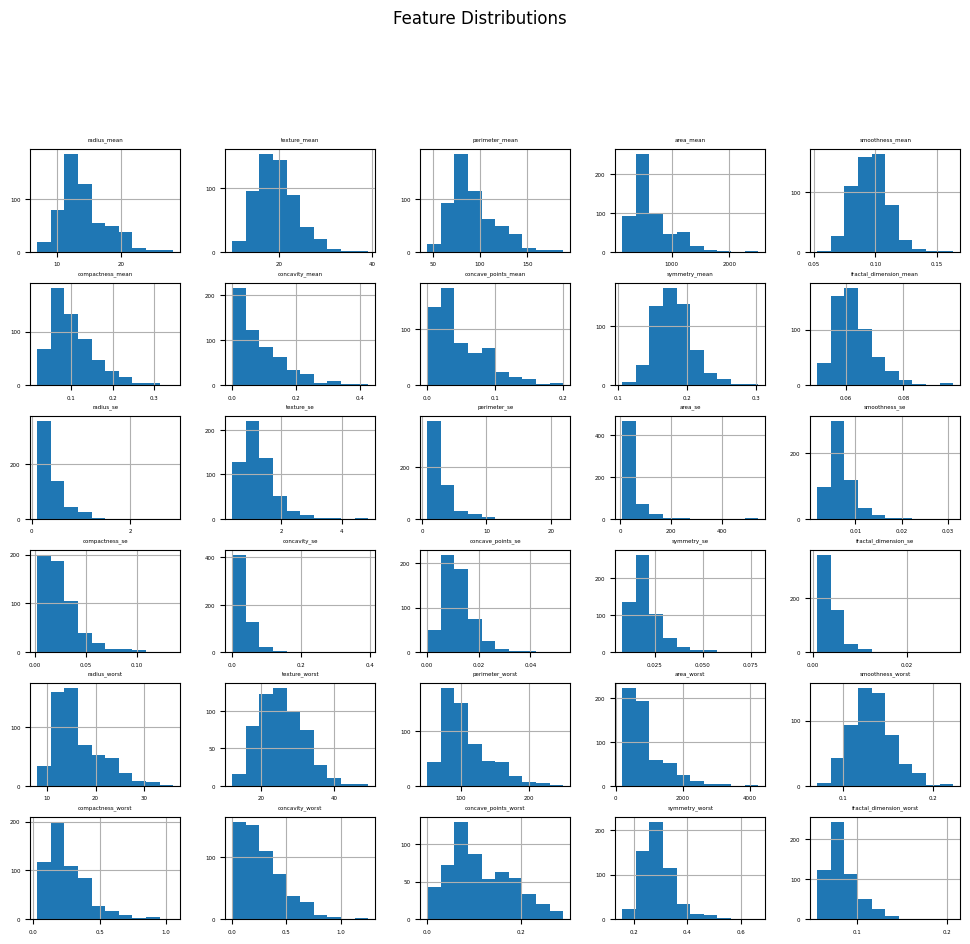

In [23]:
# Histograms of the variables
# Creates histograms for all columns in the 'dataset' DataFrame starting from the third column (index 2) to the end. Sets x and y label sizes, and figure size.
fig = dataset.iloc[:, 2:].hist(xlabelsize=4, ylabelsize=4, figsize=(12, 10))
# Iterates through each histogram subplot in the figure and sets the title size to 4.
[x.title.set_size(4) for x in fig.ravel()]
# Sets the suptitle (overall title) for the entire figure to "Feature Distributions", adjusting vertical position for better layout.
plt.suptitle("Feature Distributions", y=1.02)
# Displays the generated histograms plot.
plt.show()

### Evaluate KNN on the raw dataset

In [24]:
# Separate into input and output columns
X = dataset.iloc[:, 2:].values  # Features (all columns except ID and diagnosis)
y = dataset["diagnosis"].values  # Target (M=Malignant, B=Benign)

# Encode labels (M=1, B=0)
y = LabelEncoder().fit_transform(y)

# Define and configure the model
model = KNeighborsClassifier()

# Evaluate the model
# Defines cross-validation splitting strategy using RepeatedStratifiedKFold for robust evaluation.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Performs cross-validation to evaluate the 'model' using features 'X' and target 'y', scoring by 'accuracy'.
n_scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

# Report model performance
print("\nKNN Accuracy (Raw Data): %.3f (%.3f)" % (mean(n_scores), std(n_scores)))


KNN Accuracy (Raw Data): 0.934 (0.030)


### Visualize a polynomial features transform of the dataset

In [25]:
# Perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
data = trans.fit_transform(X)

# Convert the array back to a dataframe
dataset_transformed = DataFrame(data)

# Summarize
print("\nTransformed Dataset Shape:", dataset_transformed.shape)

# Evaluate KNN on the dataset with polynomial features transform

# Define the pipeline
trans = PolynomialFeatures(degree=3)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[("t", trans), ("m", model)])

# Evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

# Report pipeline performance
print("\nKNN Accuracy (Polynomial Features): %.3f (%.3f)" % (mean(n_scores), std(n_scores)))


Transformed Dataset Shape: (569, 5456)

KNN Accuracy (Polynomial Features): 0.930 (0.026)


### Compare the effect of the degree on the number of created features

Degree: 1, Features: 31
Degree: 2, Features: 496
Degree: 3, Features: 5456
Degree: 4, Features: 46376


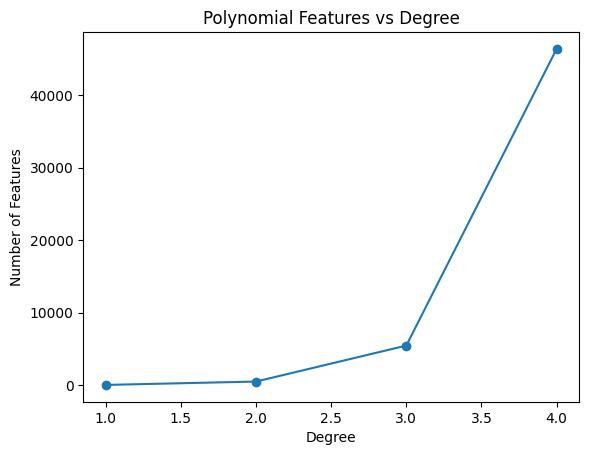

In [26]:
# Calculate change in number of features
num_features = []
degrees = list(range(1, 5))
for d in degrees:
    # Create transform
    trans = PolynomialFeatures(degree=d)
    # Fit and transform
    data = trans.fit_transform(X)
    # Record number of features
    num_features.append(data.shape[1])
    # Summarize
    print("Degree: %d, Features: %d" % (d, data.shape[1]))

# Plot degree vs number of features
plt.plot(degrees, num_features, marker='o')
plt.xlabel("Degree")
plt.ylabel("Number of Features")
plt.title("Polynomial Features vs Degree")
plt.show()

### Understanding Polynomial Feature Expansion

#### Plot Explanation
The plot shows the relationship between the polynomial degree and the number of generated features in the dataset. As the degree increases, the number of polynomial features grows exponentially.

##### Key Observations:
- The x-axis represents the **degree of polynomial features**.
- The y-axis represents the **number of features** after applying polynomial expansion.
- For low-degree polynomials (e.g., degree 1 and 2), the number of features remains relatively small.
- As the degree increases beyond 3, the number of features grows dramatically, highlighting the **curse of dimensionality**.

#### Interpretation:
- **Degree 1** corresponds to the original feature set.
- **Degree 2 and 3** show a gradual increase in the number of features.
- **Degree 4** shows an exponential rise, leading to a significant increase in the number of features, which can cause computational inefficiency and overfitting.

##### Summary:
This plot illustrates the importance of carefully choosing the polynomial degree in machine learning models. While higher-degree polynomials can capture more complex relationships, they also introduce a high computational cost and risk of overfitting.


## Explore the effect of degree on accuracy for the polynomial features transform

> Degree=1, Accuracy: 0.934 (0.030)
> Degree=2, Accuracy: 0.930 (0.026)
> Degree=3, Accuracy: 0.930 (0.026)
> Degree=4, Accuracy: 0.930 (0.027)


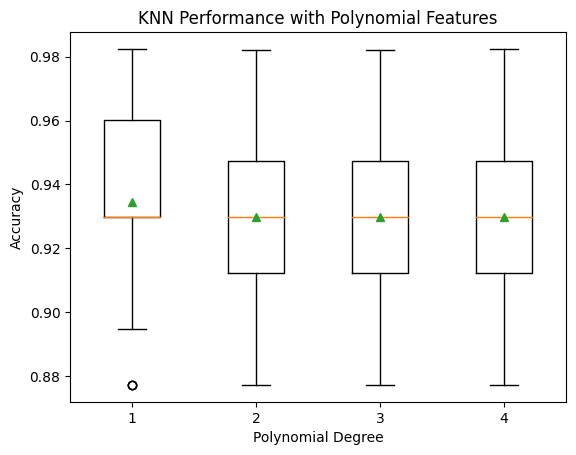

In [27]:
warnings.filterwarnings("ignore")

# Get a list of models to evaluate
# Defines a function called 'get_models' that returns a dictionary of machine learning pipelines.
def get_models():
    # Initializes an empty dictionary called 'models' to store the pipelines.
    models = {}
    # Iterates through degrees from 1 to 4 (exclusive of 5) to create polynomial features.
    for d in range(1, 5):
        # Define the pipeline
        # Creates a PolynomialFeatures transformer with the current degree 'd'.
        trans = PolynomialFeatures(degree=d)
        # Creates a KNeighborsClassifier model with default parameters.
        model = KNeighborsClassifier()
        # Stores the pipeline in the 'models' dictionary with the degree 'd' as the key.
        models[str(d)] = Pipeline(steps=[("t", trans), ("m", model)])
    # Returns the dictionary 'models' containing pipelines for different polynomial degrees.
    return models

# Evaluate a given model using cross-validation
# Defines a function called 'evaluate_model' that takes a model, features (X), and labels (y) as input to evaluate model performance.
def evaluate_model(model, X, y):
    # Initializes RepeatedStratifiedKFold cross-validation with 10 splits, 3 repeats, and a fixed random state for reproducibility.
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Performs cross-validation using the provided model, features (X), and labels (y), scoring accuracy, using the defined cross-validation strategy (cv), and utilizing all available CPU cores (n_jobs=-1).
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
    # Returns the array of accuracy scores obtained from cross-validation.
    return scores

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results = []
names = []
# Iterate through each item (model name and model object) in the 'models' dictionary.
for name, model in models.items():
    # Evaluate the current 'model' using the 'evaluate_model' function with features 'X' and labels 'y', and store the scores.
    scores = evaluate_model(model, X, y)
    # Append the calculated 'scores' to the 'results' list.
    results.append(scores)
    # Append the current 'model' name to the 'names' list.
    names.append(name)
    # Print the model's degree (name), mean accuracy score, and standard deviation of accuracy scores, formatted to 3 decimal places.
    print("> Degree=%s, Accuracy: %.3f (%.3f)" % (name, mean(scores), std(scores)))

# Plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy")
plt.title("KNN Performance with Polynomial Features")
plt.show()

### KNN Performance with Polynomial Features

#### Plot Explanation
The box plot illustrates the **accuracy** of a K-Nearest Neighbors (KNN) classifier with different polynomial feature transformations. The x-axis represents the **polynomial degree**, while the y-axis shows the **accuracy** of the model.

##### Key Observations:
- The **median accuracy** (orange line) remains relatively stable across polynomial degrees 1 to 4.
- The **mean accuracy** (green triangle) is similar across different degrees, indicating that increasing polynomial features does not significantly improve performance.
- The **variance (spread of the box)** increases slightly for higher polynomial degrees, suggesting that adding more features may introduce more variability.
- The presence of **outliers** at lower degrees suggests occasional drops in accuracy for specific runs.

#### Interpretation:
- **Polynomial Degree 1**: The model performs well, with a relatively high median and minimal variance.
- **Polynomial Degrees 2-4**: While the accuracy remains stable, the variance slightly increases, implying that additional polynomial features do not substantially improve KNN performance.

#### Summary:
- Applying polynomial feature expansion does not necessarily enhance KNN model accuracy.
- Higher polynomial degrees increase feature complexity but may not provide better predictive power, potentially leading to overfitting or computational inefficiency.


## Conclusion

Through this module, we learned how to create polynomial features to potentially improve model performance. We explored the impact of different polynomial degrees on feature space dimensionality and model accuracy. The techniques demonstrated show how feature engineering can expose non-linear relationships in data that may improve predictive modeling results.

## Clean up

Remember to shut down your Jupyter Notebook environment and delete any unnecessary files or resources once you've completed the tutorial.￼